In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('C:\\Users\\DELL\\Desktop\\Churn_Modelling_Dataset.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dividing the dataset into independent variables(features) and dependent variables(labels)

In [5]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
print(X.shape,y.shape)

(10000, 10) (10000,)


In [ ]:
#Feature Enginneering[Removing or duplicating or creating dummies for certain features]

In [6]:
pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [7]:
dataset['Geography'].head

<bound method NDFrame.head of 0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object>

In [9]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [10]:
X = X.drop(['Geography', 'Gender'], axis = 1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
X = pd.concat([X, geography, gender], axis = 1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [15]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [16]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False


In [17]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [19]:
#ANN Creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LeakyReLU,PReLU, ReLU,ELU, Dropout

#Lets initialize ANN
classifier = Sequential()
#Adding input layer
classifier.add(Dense(11, activation = 'relu'))
#Adding Hidden Layer 1
classifier.add(Dense(10, activation = 'relu'))
#Adding Hidden Layer 2
classifier.add(Dense(20, activation = 'relu'))
#Adding Hidden Layer 3
classifier.add(Dense(10, activation = 'relu'))
#Finally adding Output Layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [20]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
opt = tf.keras.optimizers.Adam(learning_rate =0.015)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                 min_delta = 0.0001, patience = 20,
                                                 verbose = 1,
                                                 mode = "auto",
                                                 baseline = None,
                                                 restore_best_weights = False)

In [22]:
model = classifier.fit(X_train,y_train, 
                       validation_split = 0.33, batch_size = 10,
                       epochs = 100, callbacks = early_stopping)
model.history.keys()

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6462 - loss: 0.6051 - val_accuracy: 0.7955 - val_loss: 0.4559
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7971 - loss: 0.4334 - val_accuracy: 0.7955 - val_loss: 0.4402
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8010 - loss: 0.4128 - val_accuracy: 0.8061 - val_loss: 0.4315
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8165 - loss: 0.4080 - val_accuracy: 0.8220 - val_loss: 0.4151
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8272 - loss: 0.3948 - val_accuracy: 0.8300 - val_loss: 0.3956
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8393 - loss: 0.3780 - val_accuracy: 0.8353 - val_loss: 0.3841
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8471 - loss: 0.3486 - val_accuracy: 0.8398 - val_loss: 0.3724
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8486 - loss: 0.3588 - val_accu

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

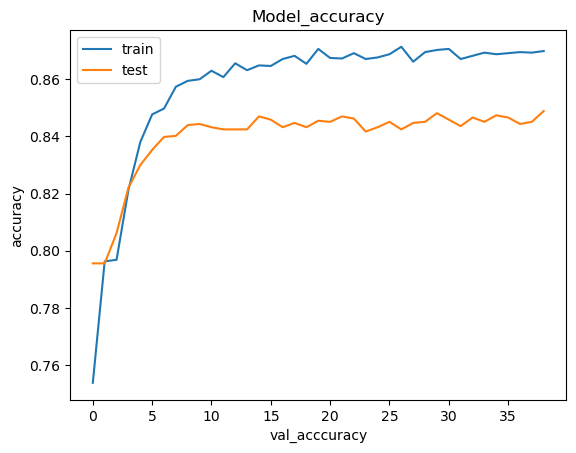

In [23]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('val_acccuracy')
plt.legend(['train', 'test', loc := 'upper left'])
plt.show()

In [24]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [26]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [27]:
classifier.get_weights()

[array([[-0.06392868,  0.18569721,  0.0704262 , -0.06299183, -0.4382717 ,
         -0.14258674,  0.10164711, -0.16039018, -0.44251412,  0.0361264 ,
          0.12065781],
        [ 0.12573174,  0.37997335,  0.32898647,  0.37261063,  0.58521885,
         -0.70687664, -0.3406715 , -0.08938932, -0.46771193, -0.6036447 ,
         -0.3731723 ],
        [ 0.06244929,  0.1268177 , -0.36672607, -0.12023228,  0.3022949 ,
         -0.02757513, -0.31865495,  0.20186457,  0.35828578,  0.08557958,
          0.40831536],
        [ 0.10590804, -0.28644416, -0.81624377,  0.08707213, -0.43903103,
         -0.2510454 , -0.17778474, -0.65254766,  0.02026972, -0.10084096,
         -0.00445516],
        [ 0.91397786, -0.11453455, -0.12592582, -0.8151232 , -0.05425693,
          0.14027274,  0.13877134, -0.9424627 ,  0.02158569, -0.01424209,
         -0.81946516],
        [-0.12385028, -0.32105744, -0.28036183, -0.08386268,  0.02277504,
         -0.14767984,  0.24915574, -0.14258657, -0.25966635,  0.0180333